In [11]:
from importdata import data
from fft import *
from mobility import *
from permutationentropy import *
from utils import *
from lempelziv import *
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from parameters import *
import logging

import matplotlib.pyplot as plt


The BIS data is universally longer than the corresponding EEG data. 
It is assumed that the recording of the BIS data started after the recording of the EEG data.
This cell trims the BIS data accordingly.

In [12]:
for case in data:
    eeg_duration = case['EEG'].shape[1]/sampling_rate
    bis_duration = case['bis'].shape[1]/bis_sampling_rate
    difference = bis_duration - eeg_duration
    trim_length = int(round(difference * bis_sampling_rate))
    case['bis'] = case['bis'][:, trim_length :]
    bis_duration = case['bis'].shape[1]/bis_sampling_rate



In [13]:

eeg_data = [case['EEG'][0] for case in data] #converts to single dimension list
bis_data = [case['bis'][0] for case in data]

eeg_train_data = eeg_data[::2]


signal_lengths = [len(case) for case in eeg_train_data]


In [14]:
decomposed_eeg_train_data = [fft(case, sampling_rate) for case in eeg_train_data] 
decomposed_eeg_train_time_domain = convert_decomposed_to_time_domain(decomposed_eeg_train_data) 
decomposed_eeg_train_time_domain_power = convert_decomposed_amplitude_to_power(decomposed_eeg_train_time_domain) 


In [15]:
mobility_amplitude_array_train = operation_on_multiple_case_data(decomposed_eeg_train_time_domain, calculate_mobility, sampling_rate, signal_lengths, mobility_window_duration, mobility_overlap_fraction)
pe_amplitude_array_train = operation_on_multiple_case_data(decomposed_eeg_train_time_domain, PE, sampling_rate, signal_lengths, complexity_features_window, complexity_features_overlap)
lzc_amplitude_array_train = operation_on_multiple_case_data(decomposed_eeg_train_time_domain, LZC_single_band, sampling_rate, signal_lengths, complexity_features_window, complexity_features_overlap)

mobility_power_array_train = operation_on_multiple_case_data(decomposed_eeg_train_time_domain_power, calculate_mobility, sampling_rate, signal_lengths, mobility_window_duration, mobility_overlap_fraction)
pe_power_array_train = operation_on_multiple_case_data(decomposed_eeg_train_time_domain_power, PE, sampling_rate, signal_lengths, complexity_features_window, complexity_features_overlap)
lzc_power_array_train = operation_on_multiple_case_data(decomposed_eeg_train_time_domain_power, LZC_single_band, sampling_rate, signal_lengths, complexity_features_window, complexity_features_overlap)

In [16]:
bis_train_data = bis_data[::2]

In [17]:
mobility_amplitude_bis_train_dict = associate_features_with_BIS(mobility_amplitude_array_train, bis_train_data, mobility_window_duration, mobility_overlap_fraction, bis_sampling_rate)
mobility_amplitude_train_r2 = linear_regression(mobility_amplitude_bis_train_dict)
print(f'mobility amplitude train r2{mobility_amplitude_train_r2}')

mobility_power_bis_train_dict = associate_features_with_BIS(mobility_power_array_train, bis_train_data, mobility_window_duration, mobility_overlap_fraction, bis_sampling_rate)
mobility_power_train_r2 = linear_regression(mobility_power_bis_train_dict)
print(f'mobility power train r2{mobility_power_train_r2}')

pe_amplitude_bis_train_dict = associate_features_with_BIS(pe_amplitude_array_train, bis_train_data, complexity_features_window, complexity_features_overlap, bis_sampling_rate)
pe_amplitude_train_r2 = linear_regression(pe_amplitude_bis_train_dict)
print(f'pe amplitude train r2{pe_amplitude_train_r2}')

pe_power_bis_train_dict = associate_features_with_BIS(pe_power_array_train, bis_train_data, complexity_features_window, complexity_features_overlap, bis_sampling_rate)
pe_power_train_r2 = linear_regression(pe_power_bis_train_dict)
print(f'pe power train r2 {pe_power_train_r2}')

lzc_amplitude_bis_train_dict = associate_features_with_BIS(lzc_amplitude_array_train, bis_train_data, complexity_features_window, complexity_features_overlap, bis_sampling_rate)
lzc_amplitude_train_r2 = linear_regression(lzc_amplitude_bis_train_dict)
print(f'lzc amplitude train r2 {lzc_amplitude_train_r2}')

lzc_power_bis_train_dict = associate_features_with_BIS(lzc_power_array_train, bis_train_data, complexity_features_window, complexity_features_overlap, bis_sampling_rate)
lzc_power_train_r2 = linear_regression(lzc_power_bis_train_dict)
print(f'lzc power train r2 {lzc_power_train_r2}')



length feature data: 3
length of bis_flat: 3
length feature data: 0
length of bis_flat: 0
length feature data: 474
length of bis_flat: 474
length feature data: 1240
length of bis_flat: 1240
length feature data: 1187
length of bis_flat: 1187
length feature data: 2587
length of bis_flat: 2587
length feature data: 4
length of bis_flat: 4
length feature data: 2664
length of bis_flat: 2664
length feature data: 1556
length of bis_flat: 1556
length feature data: 881
length of bis_flat: 881
length feature data: 1900
length of bis_flat: 1900
length feature data: 1181
length of bis_flat: 1181
length feature data: 3
length of bis_flat: 3
length feature data: 0
length of bis_flat: 0
length feature data: 485
length of bis_flat: 485
length feature data: 1240
length of bis_flat: 1240
length feature data: 1187
length of bis_flat: 1187
length feature data: 2597
length of bis_flat: 2597
length feature data: 4
length of bis_flat: 4
length feature data: 2674
length of bis_flat: 2674
length feature data: 1

Text(0.5, 1.0, 'Mobility')

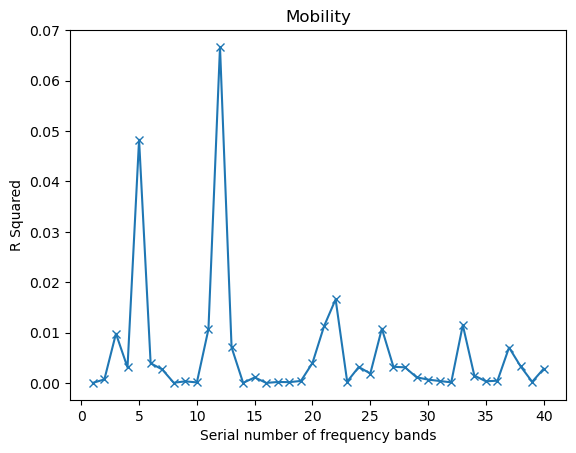

In [18]:
r2_mobility = list(mobility_amplitude_train_r2.values()) + list(mobility_power_train_r2.values())
frequency_bands_mobility = list(range(1, len(r2_mobility) + 1))

plt.plot(frequency_bands_mobility, r2_mobility, marker = 'x')

plt.xlabel("Serial number of frequency bands")
plt.ylabel("R Squared")
plt.title("Mobility")





Text(0.5, 1.0, 'Permutation Entropy')

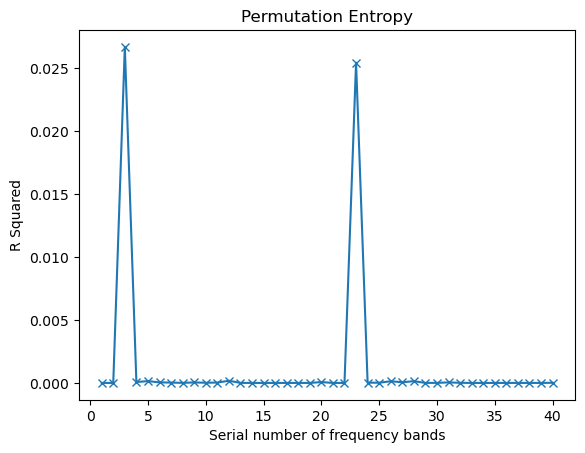

In [19]:
r2_pe = list(pe_amplitude_train_r2.values()) + list(pe_power_train_r2.values())
frequency_bands_pe = list(range(1, len(r2_pe) + 1))

plt.plot(frequency_bands_pe, r2_pe, marker = 'x')

plt.xlabel("Serial number of frequency bands")
plt.ylabel("R Squared")
plt.title("Permutation Entropy")

Text(0.5, 1.0, 'Lempel-Ziv Complexity')

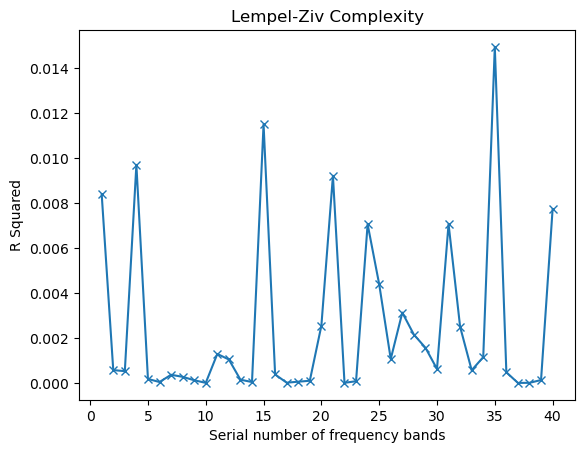

In [20]:
r2_lzc = list(lzc_amplitude_train_r2.values()) + list(lzc_power_train_r2.values())
frequency_bands_lzc = list(range(1, len(r2_lzc) + 1))

plt.plot(frequency_bands_lzc, r2_lzc, marker = 'x')

plt.xlabel("Serial number of frequency bands")
plt.ylabel("R Squared")
plt.title("Lempel-Ziv Complexity")